# Bus frequency calculation

o getting a list of every stop served by a route involves combining several models:

routes.txt gives you the route ID for the route you're interested in.

trips.txt gives you a set of trip IDs for that route.

stop_times.txt gives you a set of stop IDs for the stops served on each of these trips.

stops.txt gives you information about each of these stops.

http://transitfeeds.com/p/greater-cleveland-regional-transit-authority/214/latest

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
df_routes=pd.read_csv("routes.txt")

In [3]:
df_routes.head()

,route_long_name,route_id,route_type,route_text_color,agency_id,route_color,route_url,route_desc,route_short_name
0,East 79th,2-137,3,NaN,NaN,NaN,http://www.riderta.com/routes/2/,NaN,2
1,St. Clair,1-137,3,NaN,NaN,NaN,http://www.riderta.com/routes/1/,NaN,1
2,BRT,6-137,3,NaN,NaN,NaN,http://www.riderta.com/routes/HealthLine/,NaN,HealthLine
3,NineTwelve Trolley,60-137,3,NaN,NaN,NaN,http://www.riderta.com/routes/ninetwelve/,NaN,60
4,Strongsville Park-N-Ride,251-137,3,NaN,NaN,NaN,http://www.riderta.com/routes/251/,NaN,251


In [4]:
df_routes.describe()

,route_type,route_text_color,agency_id,route_color,route_desc
count,63.000000,0,0,0,0
mean,2.841270,NaN,NaN,NaN,NaN
std,0.627498,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN
25%,3.000000,NaN,NaN,NaN,NaN
50%,3.000000,NaN,NaN,NaN,NaN
75%,3.000000,NaN,NaN,NaN,NaN
max,3.000000,NaN,NaN,NaN,NaN


In [4]:
df_trips=pd.read_csv("trips.txt")

In [5]:
df_trips.head()

,block_id,route_id,original_trip_id,direction_id,trip_headsign,shape_id,service_id,trip_id
0,a_1919096,66-137,NaN,0,Red Line - Tower City / Public Square,660066,1511R2-hr1511a7-Sunday-21,13827680-1511R2-hr1511a7-Sunday-21
1,b_1908463,37-137,13694334-1511H-hh1511a7-Sunday-40,0,37 East 185th/Lakeshore,370059,1511H-hh1511a7-Sunday-40_merged_7610037,13694334-1511H-hh1511a7-Sunday-40_merged_7618624
2,b_1912698,6-137,13755271-1511H-hh1511a1-Weekday-40,1,Healthline/Public Square,60005,1511H-hh1511a1-Weekday-40_merged_7610035,13755271-1511H-hh1511a1-Weekday-40_merged_7625526
3,a_1919088,7-137,NaN,1,7 East 89th-Euclid,70058,1511H-hh1511a7-Sunday-41,13826366-1511H-hh1511a7-Sunday-41
4,b_1937693,66-141,NaN,0,Red Line - Stokes / Windermere,660075,1511R2-hr1511a1-Weekday-28,13933351-1511R2-hr1511a1-Weekday-28


In [8]:
df_stop_times = pd.read_csv("stop_times.txt")

In [9]:
df_stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint
0,13827680-1511R2-hr1511a7-Sunday-21,25:14:00,25:14:00,28909,1,NaN,NaN,NaN,NaN,NaN
1,13827680-1511R2-hr1511a7-Sunday-21,25:17:00,25:17:00,28908,2,NaN,NaN,NaN,NaN,NaN
2,13827680-1511R2-hr1511a7-Sunday-21,25:21:00,25:21:00,28910,3,NaN,NaN,NaN,NaN,NaN
3,13827680-1511R2-hr1511a7-Sunday-21,25:24:00,25:24:00,28911,4,NaN,NaN,NaN,NaN,NaN
4,13827680-1511R2-hr1511a7-Sunday-21,25:26:00,25:26:00,28912,5,NaN,NaN,NaN,NaN,NaN


In [10]:
df_calender = pd.read_csv("calendar.txt")

In [11]:
df_calender

,service_id,start_date,end_date,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,1511R2-hr1511a1-Weekday-20,20151123,20160212,1,1,1,1,1,0,0
1,1511H-hh1511a1-Weekday-40_merged_7610035,20160215,20160408,1,1,1,1,1,0,0
2,1511H-hh1511a7-Sunday-40_merged_7610037,20160221,20160403,0,0,0,0,0,0,1
3,1511T2-ht1511b7-Sunday-91,20151123,20160101,0,0,0,1,1,0,0
4,1511T2-ht1511b1-Weekday-91_merged_7610036,20160215,20160408,1,1,1,1,1,0,0
5,1511R2-hr1511a1-Weekday-28,20160215,20160408,1,1,1,1,1,0,0
6,1511H-hh1511a7-Sunday-40_merged_7610032,20151122,20160214,0,0,0,0,0,0,1
7,1511T2-ht1511b6-Saturday-93,20160220,20160409,0,0,0,0,0,1,0
8,1511T2-ht1511b1-Weekday-91_merged_7610031,20151123,20160212,1,1,1,1,1,0,0
9,1511T2-ht1511b7-Sunday-90_merged_7610033,20160221,20160403,0,0,0,0,0,0,1


In [12]:
df_stops = pd.read_csv("stops.csv")

In [13]:
df_stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station
0,00001,NaN,COLUMBUS ST & BROADWAY,NaN,41.392864,-81.536557,NaN,NaN,0,NaN
1,00002,NaN,10800 BROOKPARK RD (HOME DEPOT),NaN,41.418556,-81.760788,NaN,NaN,0,NaN
2,00004,NaN,EUCLID AV & E 101ST ST,NaN,41.503712,-81.617399,NaN,NaN,0,NaN
3,00005,NaN,10081 W RIDGEWOOD DR,NaN,41.384525,-81.755926,NaN,NaN,0,NaN
4,00014,NaN,102 PROSPECT AV W,NaN,41.498030,-81.692012,NaN,NaN,0,NaN


In [71]:
df_calender

,service_id,start_date,end_date,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,1511R2-hr1511a1-Weekday-20,20151123,20160212,1,1,1,1,1,0,0
1,1511H-hh1511a1-Weekday-40_merged_7610035,20160215,20160408,1,1,1,1,1,0,0
2,1511H-hh1511a7-Sunday-40_merged_7610037,20160221,20160403,0,0,0,0,0,0,1
3,1511T2-ht1511b7-Sunday-91,20151123,20160101,0,0,0,1,1,0,0
4,1511T2-ht1511b1-Weekday-91_merged_7610036,20160215,20160408,1,1,1,1,1,0,0
5,1511R2-hr1511a1-Weekday-28,20160215,20160408,1,1,1,1,1,0,0
6,1511H-hh1511a7-Sunday-40_merged_7610032,20151122,20160214,0,0,0,0,0,0,1
7,1511T2-ht1511b6-Saturday-93,20160220,20160409,0,0,0,0,0,1,0
8,1511T2-ht1511b1-Weekday-91_merged_7610031,20151123,20160212,1,1,1,1,1,0,0
9,1511T2-ht1511b7-Sunday-90_merged_7610033,20160221,20160403,0,0,0,0,0,0,1


In [14]:
group1 = df_stop_times.groupby("stop_id")

In [16]:
df1= group1.count()

In [17]:
df1.head()

,trip_id,arrival_time,departure_time,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint
stop_id,,,,,,,,,
00001,154,154,154,154,0,0,0,0,0
00002,170,170,170,170,0,0,0,0,0
00004,757,757,757,757,0,0,0,0,0
00005,289,289,289,289,0,0,0,0,0
00014,1361,1361,1361,1361,0,0,0,0,0


In [19]:
# df.ix[:,'b':]
df2 = df1.ix[:,"arrival_time":"departure_time"]

In [21]:
df2.head()

,arrival_time,departure_time
stop_id,,
00001,154,154
00002,170,170
00004,757,757
00005,289,289
00014,1361,1361


In [22]:
df_stops_index = df_stops.set_index("stop_id") 

In [23]:
df_stops_index.head()

,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station
stop_id,,,,,,,,,
00001,NaN,COLUMBUS ST & BROADWAY,NaN,41.392864,-81.536557,NaN,NaN,0,NaN
00002,NaN,10800 BROOKPARK RD (HOME DEPOT),NaN,41.418556,-81.760788,NaN,NaN,0,NaN
00004,NaN,EUCLID AV & E 101ST ST,NaN,41.503712,-81.617399,NaN,NaN,0,NaN
00005,NaN,10081 W RIDGEWOOD DR,NaN,41.384525,-81.755926,NaN,NaN,0,NaN
00014,NaN,102 PROSPECT AV W,NaN,41.498030,-81.692012,NaN,NaN,0,NaN


In [29]:
df3 = pd.concat([df_stops_index, df2], axis = 1)

In [30]:
df3

,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,arrival_time,departure_time
00001,NaN,COLUMBUS ST & BROADWAY,NaN,41.392864,-81.536557,NaN,NaN,0,NaN,154,154
00002,NaN,10800 BROOKPARK RD (HOME DEPOT),NaN,41.418556,-81.760788,NaN,NaN,0,NaN,170,170
00004,NaN,EUCLID AV & E 101ST ST,NaN,41.503712,-81.617399,NaN,NaN,0,NaN,757,757
00005,NaN,10081 W RIDGEWOOD DR,NaN,41.384525,-81.755926,NaN,NaN,0,NaN,289,289
00014,NaN,102 PROSPECT AV W,NaN,41.498030,-81.692012,NaN,NaN,0,NaN,1361,1361
00019,NaN,1028 PROSPECT AV E,NaN,41.499173,-81.684386,NaN,NaN,0,NaN,1764,1764
00020,NaN,1027 SUPERIOR AV E,NaN,41.502891,-81.687717,NaN,NaN,0,NaN,224,224
00024,NaN,10406 KINSMAN RD,NaN,41.469942,-81.612328,NaN,NaN,0,NaN,351,351
00025,NaN,10427 DETROIT AV,NaN,41.480662,-81.757410,NaN,NaN,0,NaN,357,357
00026,NaN,10428 DETROIT AV,NaN,41.480827,-81.757532,NaN,NaN,0,NaN,355,355


In [32]:
df4 = df3.drop("departure_time",1)

In [34]:
df4.head()

,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,arrival_time
00001,NaN,COLUMBUS ST & BROADWAY,NaN,41.392864,-81.536557,NaN,NaN,0,NaN,154
00002,NaN,10800 BROOKPARK RD (HOME DEPOT),NaN,41.418556,-81.760788,NaN,NaN,0,NaN,170
00004,NaN,EUCLID AV & E 101ST ST,NaN,41.503712,-81.617399,NaN,NaN,0,NaN,757
00005,NaN,10081 W RIDGEWOOD DR,NaN,41.384525,-81.755926,NaN,NaN,0,NaN,289
00014,NaN,102 PROSPECT AV W,NaN,41.498030,-81.692012,NaN,NaN,0,NaN,1361


In [35]:
#df = df.rename(columns={'$a': 'a', '$b': 'b'})
df5 = df4.rename(columns = {'arrival_time':'total_bus_frequency'})

In [37]:
df5.head()

,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,total_bus_frequency
00001,NaN,COLUMBUS ST & BROADWAY,NaN,41.392864,-81.536557,NaN,NaN,0,NaN,154
00002,NaN,10800 BROOKPARK RD (HOME DEPOT),NaN,41.418556,-81.760788,NaN,NaN,0,NaN,170
00004,NaN,EUCLID AV & E 101ST ST,NaN,41.503712,-81.617399,NaN,NaN,0,NaN,757
00005,NaN,10081 W RIDGEWOOD DR,NaN,41.384525,-81.755926,NaN,NaN,0,NaN,289
00014,NaN,102 PROSPECT AV W,NaN,41.498030,-81.692012,NaN,NaN,0,NaN,1361


In [38]:
df5.to_csv("stops_frequency.csv")

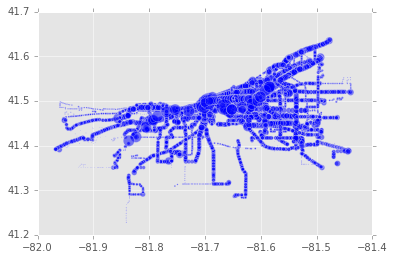

In [70]:
plt.scatter(df5.stop_lon, df5.stop_lat, s=df5.total_bus_frequency/10, alpha =0.5)
plt.ylim(41.2, 41.7)
plt.xlim(-82, -81.4)
plt.savefig("totalButFrequency.png")

In [43]:
plt.style.use("ggplot")

In [56]:
df5.describe()

,stop_code,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,total_bus_frequency
count,0,0,6367.000000,6367.000000,0,0,6367.000000,6308.000000
mean,NaN,NaN,41.465099,-81.661435,NaN,NaN,0.007068,204.282181
std,NaN,NaN,0.065410,0.121885,NaN,NaN,0.083779,202.837375
min,NaN,NaN,41.227883,-81.967530,NaN,NaN,0.000000,2.000000
25%,NaN,NaN,41.424991,-81.748190,NaN,NaN,0.000000,90.000000
50%,NaN,NaN,41.467930,-81.638871,NaN,NaN,0.000000,154.000000
75%,NaN,NaN,41.503925,-81.563384,NaN,NaN,0.000000,262.500000
max,NaN,NaN,41.637051,-81.438542,NaN,NaN,1.000000,2621.000000


In [72]:
df6 = df5[df5.total_bus_frequency>204]

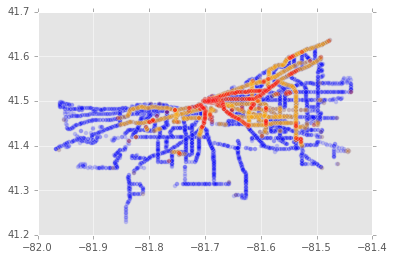

In [84]:
plt.scatter(df5.stop_lon, df5.stop_lat, c='blue',  alpha =0.2)
plt.scatter(df6.stop_lon, df6.stop_lat, c='orange',  alpha =0.2)
plt.scatter(df7.stop_lon, df7.stop_lat, c='red', alpha =0.2)
plt.ylim(41.2, 41.7)
plt.xlim(-82, -81.4)
plt.savefig("bus_frequency_heatmap.png")

In [75]:
df7 = df5[df5.total_bus_frequency>400]

(-82, -81.4)

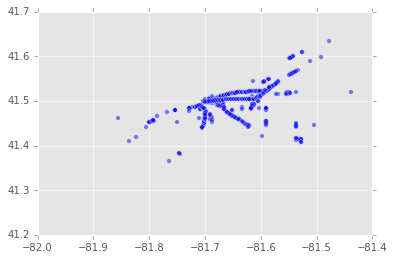

In [76]:
plt.scatter(df7.stop_lon, df7.stop_lat,  alpha =0.5)
plt.ylim(41.2, 41.7)
plt.xlim(-82, -81.4)

In [85]:
df_stops_frequency = pd.read_csv("stops_frequency.csv")

In [86]:
df_stops_frequency.head()

,Unnamed: 0,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,total_bus_frequency
0,00001,NaN,COLUMBUS ST & BROADWAY,NaN,41.392864,-81.536557,NaN,NaN,0,NaN,154
1,00002,NaN,10800 BROOKPARK RD (HOME DEPOT),NaN,41.418556,-81.760788,NaN,NaN,0,NaN,170
2,00004,NaN,EUCLID AV & E 101ST ST,NaN,41.503712,-81.617399,NaN,NaN,0,NaN,757
3,00005,NaN,10081 W RIDGEWOOD DR,NaN,41.384525,-81.755926,NaN,NaN,0,NaN,289
4,00014,NaN,102 PROSPECT AV W,NaN,41.498030,-81.692012,NaN,NaN,0,NaN,1361


In [87]:
#df = df.rename(columns={'$a': 'a', '$b': 'b'})
df_stops_frequency = df_stops_frequency.rename(columns={"Unnamed: 0":"stop_id"})

In [90]:
df_stops_frequency.to_csv("stops_frequency.csv")

In [91]:
df_stops_frequency.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,total_bus_frequency
0,00001,NaN,COLUMBUS ST & BROADWAY,NaN,41.392864,-81.536557,NaN,NaN,0,NaN,154
1,00002,NaN,10800 BROOKPARK RD (HOME DEPOT),NaN,41.418556,-81.760788,NaN,NaN,0,NaN,170
2,00004,NaN,EUCLID AV & E 101ST ST,NaN,41.503712,-81.617399,NaN,NaN,0,NaN,757
3,00005,NaN,10081 W RIDGEWOOD DR,NaN,41.384525,-81.755926,NaN,NaN,0,NaN,289
4,00014,NaN,102 PROSPECT AV W,NaN,41.498030,-81.692012,NaN,NaN,0,NaN,1361
